In [1]:
%run plocice.ipynb


<Figure size 2000x10000 with 11 Axes>

<Figure size 640x480 with 1 Axes>

54


<Figure size 640x480 with 1 Axes>

In [2]:
def generisi_pol(izl,p):
    r = []
    for i in izl:
        q =affine_h(p,i)
        x,y = q.exterior.coords[0] 
        if(x<4 and x>-4 and y<4 and y>-4):
            r.append(q)
    return r

In [3]:
def T(A):
    return (A.x,A.y)

In [4]:
def generisi_t(izl,p):
    r = []
    for i in izl:
        q =affine_h(p,i)
        x,y = q.x,q.y
        if(x<4 and x>-4 and y<4 and y>-4):
            r.append(q)
    return r

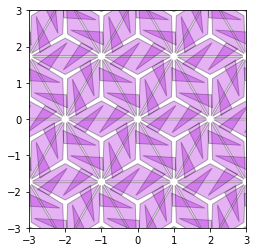

In [32]:
#pol = Polygon([(0.25,0.1),(0.45, 0.1), (0.45,1), (0.25,1)])
pol = Polygon([(0.3,0.1),(0.6, 0.3), (0.2,1.1)])

tr = Polygon([(0.1,0.02),(1.9, 0.02), (1,0.5)])
xmin,xmax,ymin,ymax = (-3,3,-3,3)
okvir = [-3,3,-3,3]
bx = plt.axes()  
bx.set_xlim(xmin,xmax)
bx.set_xticks(range(xmin,xmax+1))
bx.set_ylim(ymin,ymax)
bx.set_yticks(range(ymin,ymax+1))
bx.set_aspect(1)
crtaj(izomgen_p6,pol,bx)
crtaj(izomgen_p6,tr,bx)

plt.show()

In [33]:
slike = generisi_pol(izomgen_p6,pol)

In [34]:
def namesti(ax,xmin,xmax,ymin,ymax):
    ax.set_xlim(xmin,xmax)
    ax.set_xticks(range(xmin,xmax+1))
    ax.set_ylim(ymin,ymax)
    ax.set_yticks(range(ymin,ymax+1))
    ax.set_aspect(1)

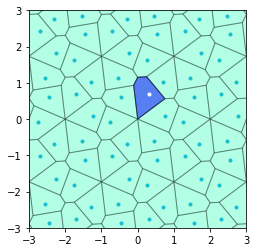

In [35]:
tacke1 = []

A = Point(0.3,0.7)
slike_A = generisi_t(izomgen_p6,A)
tacke1 = [T(s) for s in slike_A]

vor = Voronoi(tacke1)
#fig = voronoi_plot_2d(vor)

poli = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[0]]])  
ax = plt.axes()
ax.set_xlim(xmin,xmax)
ax.set_xticks(range(xmin,xmax+1))
ax.set_ylim(ymin,ymax)
ax.set_yticks(range(ymin,ymax+1))
ax.set_aspect(1)


crtaj(izomgen_p6,poli,ax,'#00FFAA')
plt.plot([T(s)[0] for s in slike_A],[T(s)[1] for s in slike_A],'C9.')
plt.plot([A.x],[A.y],'w.')
crtaj([I],poli,ax,'#0000FF',0.5)
plt.show()


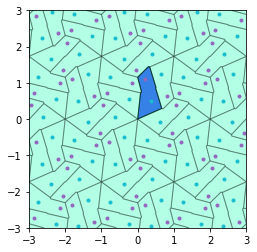

In [36]:
tacke2 = []

pol_n=0
A = Point(pol.centroid)
B = Point(pol.exterior.coords[2])
slike_A = generisi_t(izomgen_p6,A)
slike_B = generisi_t(izomgen_p6,B)
for i in range(len(slike_B)):
    tacke2.append(T(slike_A[i]))
    tacke2.append(T(slike_B[i]))

vor = Voronoi(tacke2)

pol_A = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[0]]])
pol_B = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[1]]])
pol_U=pol_A.union(pol_B)

ax = plt.axes()
namesti(ax,-3,3,-3,3)
crtaj([I],pol_U,ax,'#0000FF',0.7)


crtaj(izomgen_p6,pol_U,ax,'#00FFAA')
plt.plot([T(s)[0] for s in slike_A],[T(s)[1] for s in slike_A],'C9.')
plt.plot([T(s)[0] for s in slike_B],[T(s)[1] for s in slike_B],'C4.')
plt.show()


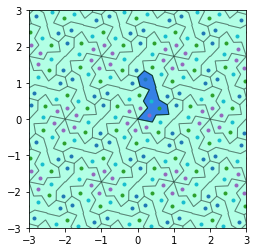

In [42]:
tacke4 = []
A = Point(pol.centroid)
B = Point(pol.exterior.coords[0])
C = Point(pol.exterior.coords[1])
D = Point(pol.exterior.coords[2])
slike_A = generisi_t(izomgen_p6,A)
slike_B = generisi_t(izomgen_p6,B)
slike_C = generisi_t(izomgen_p6,C)
slike_D = generisi_t(izomgen_p6,D)
for i in range(len(slike_D)):
    tacke4.append(T(slike_A[i]))
    tacke4.append(T(slike_B[i]))
    tacke4.append(T(slike_C[i]))
    tacke4.append(T(slike_D[i]))

vor = Voronoi(tacke4)

pol_A = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[0]]])
pol_B = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[1]]])
pol_C = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[2]]])
pol_D = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[3]]])
pol_U=pol_A.union(pol_B).union(pol_C).union(pol_D)

ax = plt.axes()
namesti(ax,-3,3,-3,3)
crtaj([I],pol_U,ax,'#0000FF',0.7)


crtaj(izomgen_p6,pol_U,ax,'#00FFAA')
plt.plot([T(s)[0] for s in slike_A],[T(s)[1] for s in slike_A],'C9.')
plt.plot([T(s)[0] for s in slike_B],[T(s)[1] for s in slike_B],'C4.')
plt.plot([T(s)[0] for s in slike_C],[T(s)[1] for s in slike_C],'C2.')
plt.plot([T(s)[0] for s in slike_D],[T(s)[1] for s in slike_D],'C0.')
plt.show()

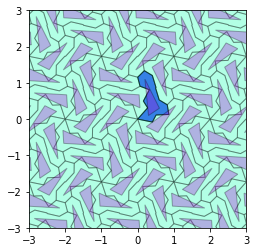

In [41]:
ax = plt.axes()
namesti(ax,-3,3,-3,3)
crtaj([I],pol_U,ax,'#0000FF',0.7)


crtaj(izomgen_p6,pol_U,ax,'#00FFAA')
crtaj(izomgen_p6, pol, ax)
plt.show()

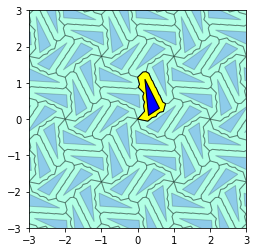

In [107]:
M = [Point(p) for p in pol.exterior.coords]
x0,y0 = pol.exterior.coords[0]
d=4
for i in range(1,len(pol.exterior.coords)):
    x1,y1 = pol.exterior.coords[i]
    for k in np.arange(0,1,1.0/d):
        M.append(Point((1-k)*x0+k*x1, (1-k)*y0+k*y1))        
    x0,y0 = x1,y1
    
M.append(Point(pol.centroid))
slike_M = [generisi_t(izomgen_p6,A) for A in M]
tacke_n=[]
n = min([len(slike_j) for slike_j in slike_M])

for i in range(n):
    for s in [T(slike_j[i]) for slike_j in slike_M]:
        tacke_n.append(s)
        #plt.plot([s[0]],[s[1]],'C0.')
vor = Voronoi(tacke_n)

pol_U = Polygon()
for i in range(len(M)):
    pol_I = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[i]]])
    pol_U = pol_U.union(pol_I)

ax = plt.axes()
namesti(ax,-3,3,-3,3)



crtaj(izomgen_p6,pol_U,ax,'#00FFAA')
crtaj([I],pol_U,ax,'#FFFF00',1)
crtaj(izomgen_p6, pol,ax,'#0000FF',0.2)
crtaj([I], pol,ax,'#0000FF',1)
plt.show()

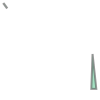

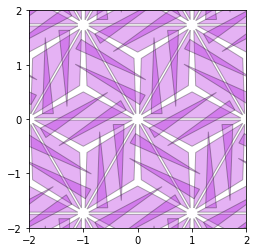

In [11]:
sl_1 = []
sl_200 =[]
pol_2=[]
x0,y0 = pol.exterior.coords[0]
sl_1.append([x0,y0])
pol_n=0
d=100

for i in range(1, len(pol.exterior.coords)):
    x1,y1= pol.exterior.coords[i]
    for p in np.arange(0,1,1.0/d):           
        x = p*x1 + (1-p)*x0
        y = p*y1 + (1-p)*y0
        pol_2.append([x,y])
    pol_2.append([x1,y1])
    x0,y0=x1,y1
    
pol_200= Polygon(pol_2)       
slike_200 = generisi_pol(izomgen_p6,pol_200)
for s in slike_200:
    for p in s.exterior.coords:
        sl_200.append(p)

n = len(slike_200[0].exterior.coords)-1
vor_200 = Voronoi(sl_200)
v_200 = vor_200.vertices
ploc=[0]*len(slike)
ax = plt.axes()  
ax.set_xlim(xmin+1,xmax-1)
ax.set_xticks(range(xmin+1,xmax))
ax.set_ylim(ymin+1,ymax-1)
ax.set_yticks(range(ymin+1,ymax))
ax.set_aspect(1)
crtaj(izomgen_p6,tr,ax) 
crtaj(izomgen_p6,pol,ax)
polii = pol
polii
polii.union(Polygon([vor_200.vertices[p] for p in vor_200.regions[vor.point_region[50]]]))
#for j in range(len(slike_200)):
#for i in range(n):
 #   polii2 = Polygon([vor_200.vertices[p] for p in vor_200.regions[vor.point_region[i]]])
 #   polii = polii.union(polii2)
        #ploc[j] = np.union1d(ploc[j],vor_200.regions[vor_200.point_region[n*j+i]])
